In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from getSIDMdata_generator import get_tf_DataSet as getGenerators
import scienceplots
import mertens_models as mertens

plt.style.use(["science"])

In [23]:
binning=20
allDataFile = 'pickles/binned_data_20.pkl'
allDataParams, images = pkl.load(open(allDataFile, 'rb'))
for i in allDataParams.keys():
    if i != 'galaxy_catalogues':
        allDataParams[i] = np.array(allDataParams[i])
images = np.array(images)

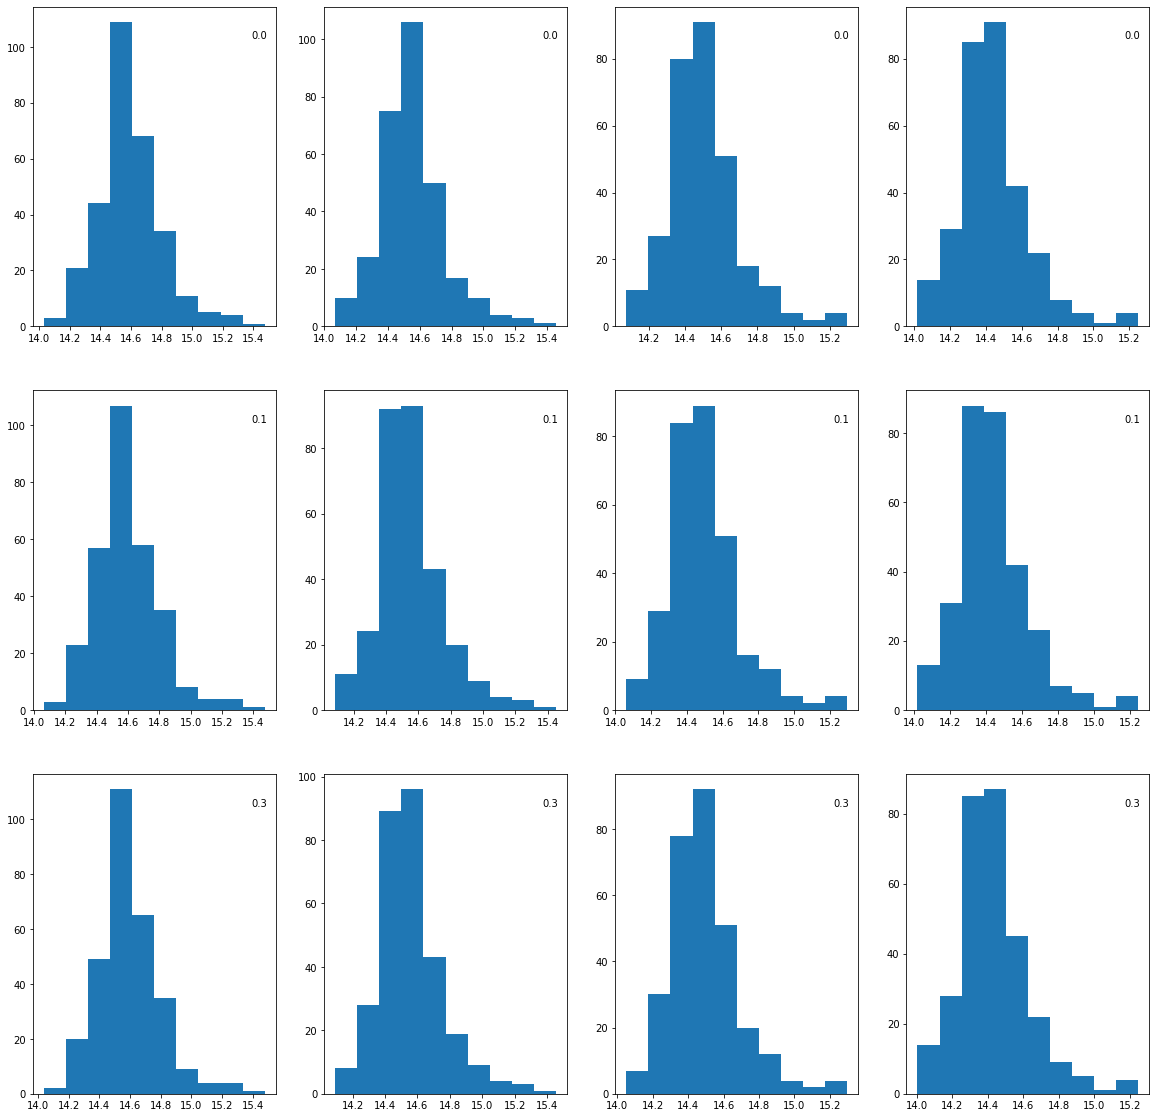

In [4]:
labelClasses = np.unique(allDataParams['label'])
fig, ax = plt.subplots( len(labelClasses), 4, figsize=(20,20))
for i, iLabel in enumerate(labelClasses):
    for j, iRedshift in enumerate([0., 0.125, 0.25, 0.375]):
        labelIndexes = np.where((allDataParams['label'] == iLabel) & (np.array(allDataParams['redshift']) == iRedshift))[0]

        ax[i,j].hist( np.array(allDataParams['mass'])[labelIndexes])
        ax[i,j].text( 0.9, 0.9, iLabel, transform=ax[i,j].transAxes)

1181
nTests is 177
1344
nTests is 201
1153
nTests is 172
1156
nTests is 173


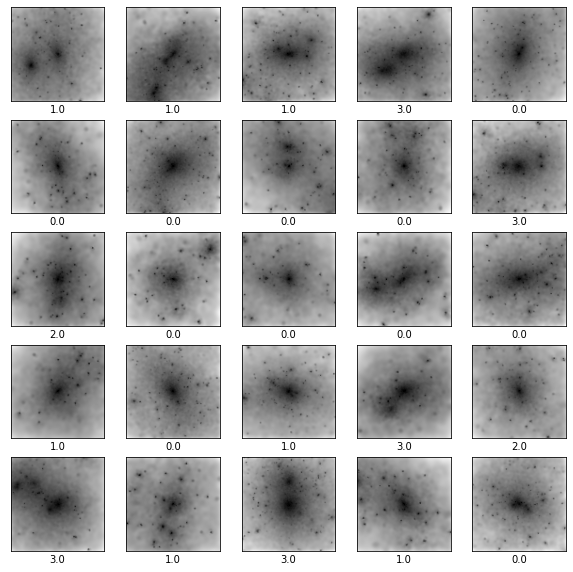

In [10]:
(train_images, train_Att,train_labels), testSets = getData(  indexFileRoot='pickles/testIndexes', testTrainSplit=0.15)
test_labels, test_images = None, None
for i in testSets.keys():
    if test_labels is None:
        test_images = testSets[i]['images']
        test_labels = testSets[i]['labels']
    else:
        test_labels = np.vstack((test_labels, testSets[i]['labels']))
        test_images = np.vstack((test_images, testSets[i]['images']))
nClasses = len(np.unique(train_labels))
inputShape = train_images.shape[1:]
plt.figure(figsize=(10,10))
for j in range(25):
    i = np.random.randint(0, train_images.shape[0])
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.xlabel(train_labels[i][0])


plt.show()


In [ ]:
simulationNames = ['CDM_low','CDM_hi','CDM','SIDM0.1','SIDM1']
train, test  = getGenerators(augment_data=True, simulationNames=simulationNames,channels=['total','stellar','xray'],
                                                      allDataFile='pickles/binned_data_20.pkl')

In [40]:
allDataParams.keys()

dict_keys(['lensing_norm', 'label', 'redshift', 'clusterID', 'sim', 'mass', 'galaxy_catalogues', 'BCG_stellar_conc', 'BCG_e1', 'BCG_e2', 'xrayConc', 'xray_norm'])

In [36]:
images[indexes].shape

(1, 100, 100, 3)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `../plots/data_example.pdf'.


0

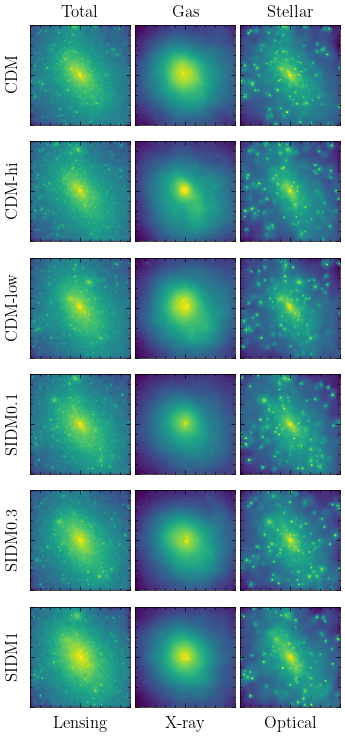

In [38]:
fig,axarr = plt.subplots(len(np.unique(allDataParams['sim'])),3,  figsize=(4, 9) )
fig.subplots_adjust(wspace=0.05,hspace=0.05)

for i, sim in enumerate(np.unique(allDataParams['sim'])):
    indexes = np.arange(len(allDataParams['sim']))[ 
        (allDataParams['clusterID'] == '2') &
        (allDataParams['redshift'] == 0 ) & 
        (allDataParams['sim'] == sim )]

    for dim in range(images[i].shape[-1]):
    
        
        axarr[i][dim].imshow(np.log10(images[indexes][0,:,:,dim]), extent=[-50,50,-50,50])
        axarr[i][0].set_ylabel(sim.split('+')[0].replace('_','-'), fontsize=12)
        axarr[i][dim].set_yticklabels([])
        axarr[i][dim].set_xticklabels([])
text = axarr[0,0].set_title('Total', fontsize=12)
text = axarr[0,1].set_title('Gas', fontsize=12)
text = axarr[0,2].set_title('Stellar', fontsize=12)
text = axarr[-1,0].set_xlabel('Lensing', fontsize=12)
text = axarr[-1,1].set_xlabel('X-ray', fontsize=12)
text = axarr[0-1,2].set_xlabel ('Optical', fontsize=12)
filename = "../plots/data_example.pdf"
plt.savefig(filename)
os.system('pdfcrop %s %s' % (filename, filename))

In [41]:
allDataFile = 'pickles/binned_data_20.pkl'
allDataParams, images = pkl.load(open(allDataFile, 'rb'))